# Hola Bruno! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Hola Bruno! Tu notebook está muy bien orientado en general, pero de la parte inicial debes corregir la imputación realizada a los score de críticas y además corregir el periodo de tiempo relevante. Una vez corregido eso, continuaré la revisión de las partes siguientes, ya que dependen fuertemente del periodo de tiempo definido como relevante.
    
Saludos!    

</div>


## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Buen trabajoa Bruno! tu notebook está casi terminado, tan solo falta que modifiques un gráfico en la comparación de ventas para juegos multiplataforma y agregues otro gráfica para comparar rentabilidad. Con eso el proyecto quedaría completado!
    
Saludos!    

</div>


## Resumen de la revisión 3 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Buen trabajo Bruno! Has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.
    
Saludos!    

</div>


----

# Proyecto Sprint 7 
## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

## Importar documentos



In [1]:
# Librerias a utilizar 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:

# Cargar el archivo CSV
file_path = 'games.csv' 
file_path = '/datasets/games.csv' # MODIFICADO REVISOR

games_data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para inspeccionarlo
print(games_data.head())

# Obtener información general sobre el dataset
print(games_data.info())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

### Primeras impresiones

Lo primero es realizar una evaluación de los valores para ver que clase de trabajo tendríamos que hacer. 

En el análisis inicial utilizando el método head(), observamos que el dataset contiene información sobre videojuegos, incluyendo su nombre, plataforma, año de lanzamiento, género, y ventas en diversas regiones (Norteamérica, Europa, Japón y otras). También incluye calificaciones de críticos y usuarios, así como la clasificación ESRB. Sin embargo, se identifican algunos valores faltantes en las columnas critic_score, user_score y rating, lo que sugiere que no todos los juegos tienen reseñas o clasificaciones completas.

Con el método info(), se confirma que el dataset tiene 16,715 entradas distribuidas en 11 columnas, algunas de las cuales contienen valores nulos. Por ejemplo, la columna year_of_release tiene 16,446 valores no nulos, lo que indica que faltan los años de lanzamiento para ciertos juegos. Además, las columnas critic_score, user_score y rating tienen una cantidad significativa de valores ausentes, especialmente rating, que tiene solo 9,949 valores no nulos. Esto indica la necesidad de un tratamiento cuidadoso de estos valores nulos durante la preparación de los datos para asegurar la calidad del análisis posterior.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, ese es el objetivo de usar info(), nos da una visión rápida de las columnas, tipos y nulos

</div>


## Preparar datos

In [3]:
# Convertir los nombres de las columnas a minúsculas
games_data.columns = games_data.columns.str.lower()

games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Convertir 'year_of_release' a entero, rellenando los NaN con 0
games_data['year_of_release'] = games_data['year_of_release'].fillna(0).astype(int)

# Convertir 'user_score' a float, manejando errores y convirtiendo valores no numéricos a NaN
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')


print(games_data.head())
games_data.info()

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (tot

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con las imputaciones de nulos. 

</div>


Valores nulos antes de imputación:
critic_score    8578
user_score      9125
dtype: int64


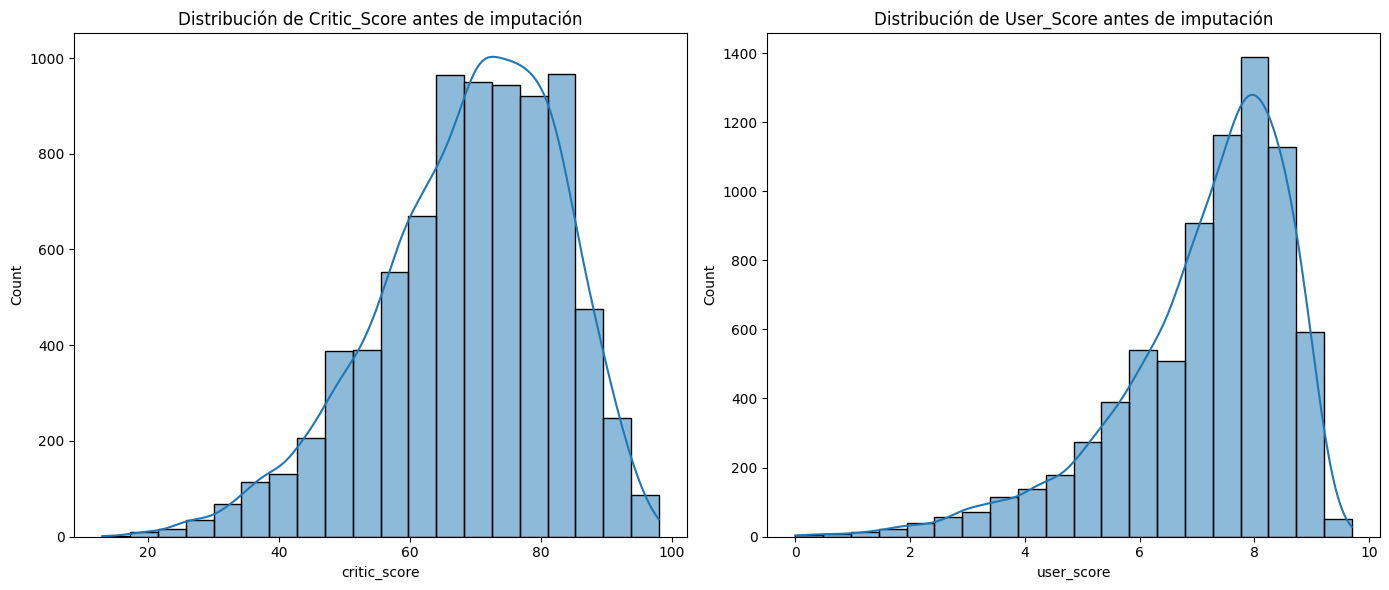


Valores nulos después de imputación:
critic_score    1120
user_score      1120
dtype: int64


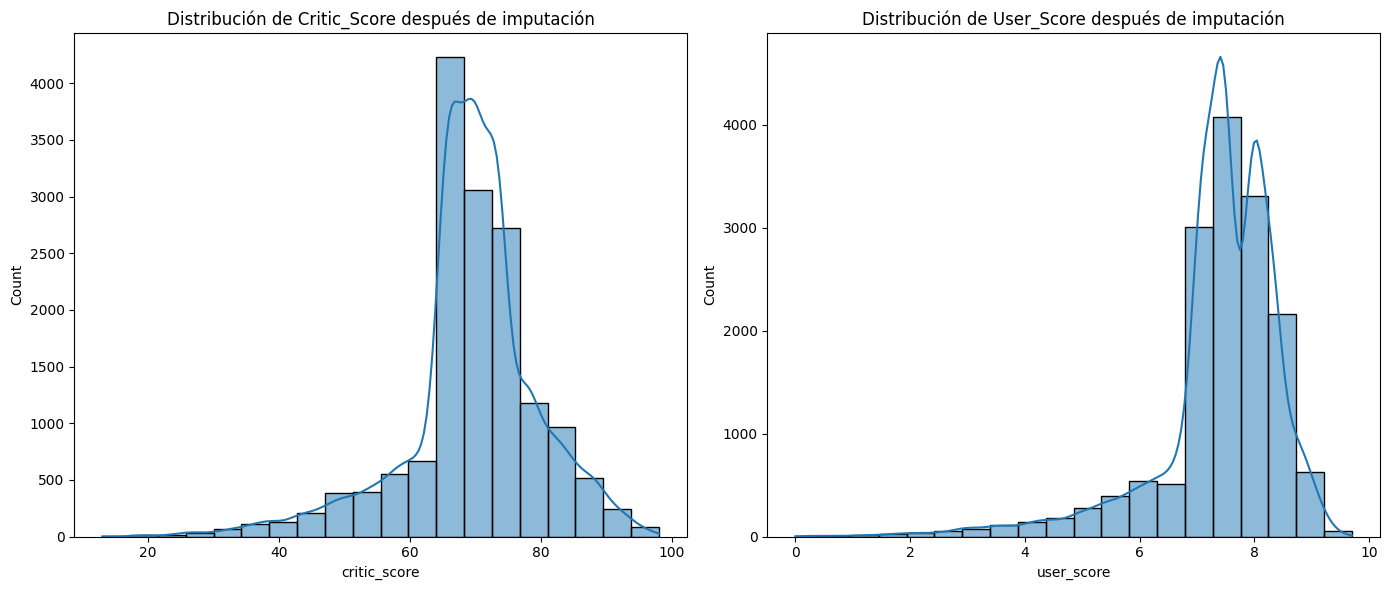

In [5]:
# Verificar si hay valores faltantes antes de imputar
print("Valores nulos antes de imputación:")
print(games_data[['critic_score', 'user_score']].isnull().sum())

# Visualizar la distribución de Critic_Score y User_Score antes de imputar
plt.figure(figsize=(14,6))

# Gráfico de densidad para Critic_Score
plt.subplot(1, 2, 1)
sns.histplot(games_data['critic_score'].dropna(), kde=True, bins=20)
plt.title('Distribución de Critic_Score antes de imputación')

# Gráfico de densidad para User_Score
plt.subplot(1, 2, 2)
sns.histplot(games_data['user_score'].dropna(), kde=True, bins=20)
plt.title('Distribución de User_Score antes de imputación')

plt.tight_layout()
plt.show()

# Función personalizada para imputar la mediana solo si el grupo no está vacío
def fill_with_median(group):
    if group.notna().sum() > 0:  # Solo calcula la mediana si hay datos no nulos
        return group.fillna(group.median())
    else:
        return group  # Deja los nulos si no hay datos para calcular la mediana

# Imputar los valores faltantes de Critic_Score y User_Score por la mediana condicional según la plataforma

# Imputar Critic_Score basado en la mediana de cada plataforma
games_data['critic_score'] = games_data.groupby('platform')['critic_score'].transform(fill_with_median)

# Imputar User_Score basado en la mediana de cada plataforma
games_data['user_score'] = games_data.groupby('platform')['user_score'].transform(fill_with_median)

# Verificar si los valores nulos han sido imputados correctamente
print("\nValores nulos después de imputación:")
print(games_data[['critic_score', 'user_score']].isnull().sum())

# Visualizar la distribución de Critic_Score y User_Score después de imputar
plt.figure(figsize=(14,6))

# Gráfico de densidad para Critic_Score después de imputación
plt.subplot(1, 2, 1)
sns.histplot(games_data['critic_score'], kde=True, bins=20)
plt.title('Distribución de Critic_Score después de imputación')

# Gráfico de densidad para User_Score después de imputación
plt.subplot(1, 2, 2)
sns.histplot(games_data['user_score'], kde=True, bins=20)
plt.title('Distribución de User_Score después de imputación')

plt.tight_layout()
plt.show()

Para manejar los valores ausentes en las columnas critic_score y user_score, se decidió rellenarlos con la mediana, condicionada por la plataforma. Esta elección se basa en la observación de la distribución de los datos, que no es perfectamente simétrica. La mediana, al ser una medida de tendencia central robusta frente a valores atípicos, ofrece una representación más fiel del "valor típico" en cada grupo, evitando que valores extremos distorsionen los resultados.

Este enfoque también permite conservar todas las filas del dataset, evitando la pérdida de información que ocurriría si se eliminaran las entradas con valores ausentes. Además, imputar los valores faltantes condicionalmente por plataforma mejora la precisión, ya que asegura que los valores imputados respeten las características específicas de cada grupo. Así se reduce el riesgo de introducir sesgos significativos, manteniendo la integridad del análisis.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

La imputación es muy simple, nota que estás llenando más de la mitad de la data con el mismo valor, esto genera un sesgo enorme en la data. Al momento de reemplazar valores nulos es importante considerar la cantidad de valores a reemplazar, además, se debe mirar la distribución para entender qué tipo de valor es más recomendable para reemplazar, según veo no se graficó la distribución como para suponer que es normal o de otro tipo. 
    
Te recomiendo dejarlos como nulos o hacer una imputación más completa (condicionando sobre otros valores por ejemplo). No es necesario eliminar las filas con nulos.

</div>


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Ok, esto es mejor, pero aún así nota que las distribuciones son diferentes antes y después, habría que justificar bien el cambio.   

</div>


In [6]:
# Reemplazar "TBD" en la columna 'rating' por "Unknown"
games_data['rating'] = games_data['rating'].replace('TBD', 'Unknown')

# Calcular las ventas totales y añadir una nueva columna 'total_sales'
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

print(games_data.head())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

Rellené los valores ausentes en las columnas critic_score y user_score utilizando la media para mantener la consistencia y evitar sesgos, ya que estas columnas son críticas para el análisis y no se deben eliminar datos innecesariamente. Los valores ausentes pueden deberse a la falta de reseñas en el momento del registro de datos o a juegos menos populares que no recibieron atención suficiente. En cuanto a la abreviatura "TBD" en la columna rating, se reemplazó por "Unknown" para uniformizar la clasificación y facilitar el análisis, dado que "TBD" implica que la información no estaba disponible al momento de registrar los datos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, TBD no es un dato nulo cualquiera, indica cierta información que podría ser importante más adelante. Muy bien con el uso de sum() para generar la columna de ventas totales

</div>


## Análisis de datos


### Pregunta 1

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?


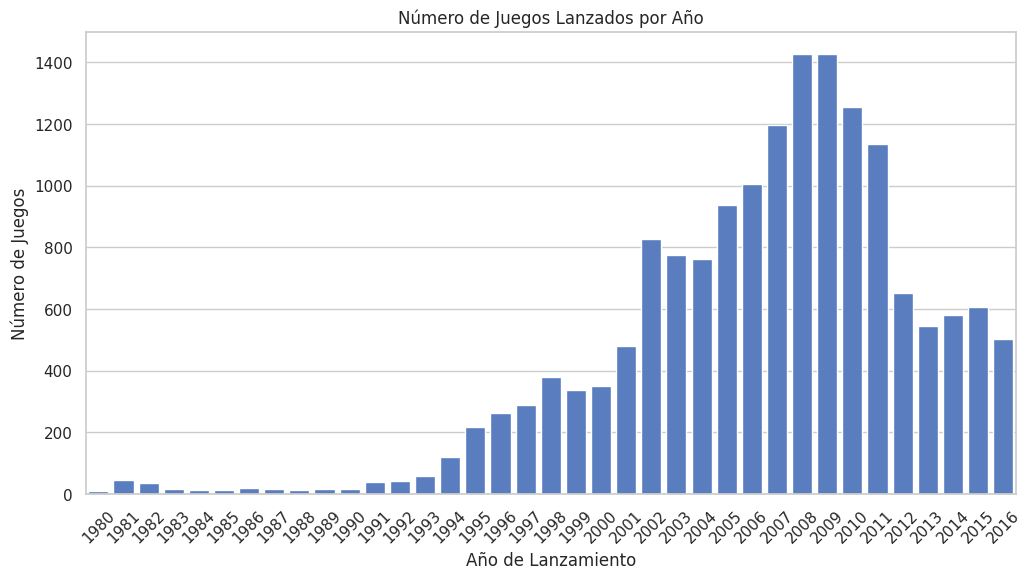

In [7]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Crear una tabla que cuenta el número de juegos por año de lanzamiento
games_per_year = games_data[games_data['year_of_release'] != 0].groupby('year_of_release')['name'].count().reset_index()

# Renombrar la columna para mayor claridad
games_per_year = games_per_year.rename(columns={'name': 'number_of_games'})

# Configurar el tamaño del gráfico
plt.figure(figsize=(12,6))

# Crear un gráfico de barras
sns.barplot(data=games_per_year, x='year_of_release', y='number_of_games', color='b')

# Configurar las etiquetas y el título del gráfico
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

El gráfico muestra que, aunque el período significativo para el análisis comienza alrededor de 1995, se debe restringir el análisis a un período más reciente para hacer predicciones precisas para el año 2017. Las industrias de rápido cambio, como la de videojuegos, requieren datos más actuales, por lo que es recomendable centrarse en los datos de los últimos tres años, es decir, de 2014 a 2016. Esto permitirá capturar las tendencias más recientes y relevantes del mercado, evitando la influencia de datos desactualizados que podrían sesgar el análisis y las predicciones para 2017.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con el gráfico, muestra claramente la evolución de la industria.

</div>


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

El periodo de años elegido es incorrecto. El objetivo de restringir la data a un periodo es escoger uno que sea relevante para la predicción del año 2017. Lo común es utilizar data de un máximo de 3 años de antigüedad para predicciones, sobre todo en industrias tan cambiantes como la de videojuegos.

</div>


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Bien, corregido

</div>


### Pregunta 2

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [8]:
# Crear una tabla que suma las ventas totales por plataforma
platform_sales = games_data.groupby('platform')['total_sales'].sum().reset_index()

# Ordenar las plataformas por ventas totales en orden descendente
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

# Mostrar las plataformas con mayores ventas totales
top_platforms = platform_sales.head(10)
print(top_platforms)


  platform  total_sales
0      PS2      1255.77
1     X360       971.42
2      PS3       939.65
3      Wii       907.51
4       DS       806.12
5       PS       730.86
6      GBA       317.85
7      PS4       314.14
8      PSP       294.05
9       PC       259.52


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, ese es el top histórico
</div>


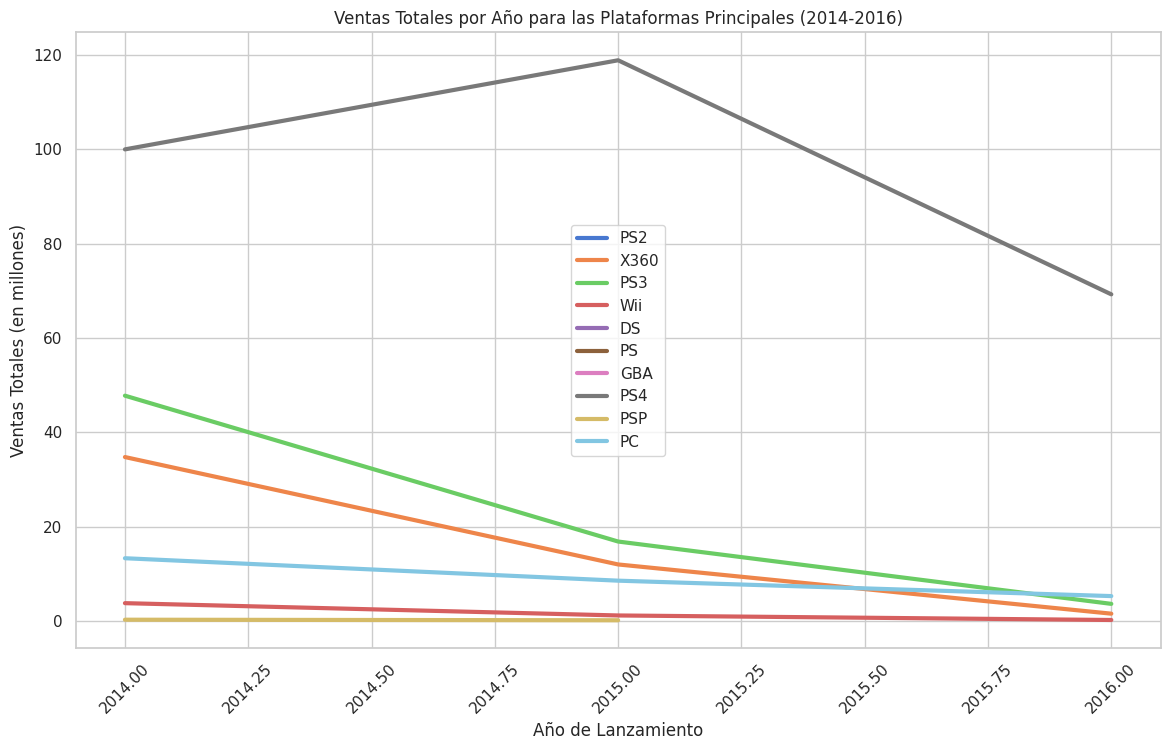

In [9]:
# Seleccionar las plataformas principales
selected_platforms = top_platforms['platform'].tolist()

# Filtrar el dataset para incluir solo las plataformas seleccionadas y años entre 2014 y 2016
platform_data = games_data[(games_data['platform'].isin(selected_platforms)) & (games_data['year_of_release'].between(2014, 2016))]

# Agrupar por año y plataforma, y sumar las ventas totales
platform_sales_per_year = platform_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(14,8))

# Crear una gráfica de líneas para cada plataforma con líneas más anchas
for platform in selected_platforms:
    data = platform_sales_per_year[platform_sales_per_year['platform'] == platform]
    plt.plot(data['year_of_release'], data['total_sales'], label=platform, linewidth=3)  # Aumentar el grosor de la línea

# Configurar las etiquetas y el título del gráfico
plt.title('Ventas Totales por Año para las Plataformas Principales (2014-2016)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()



<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con el gráfico, aunque recuerda que posteriormente el análisis de los datos debe ser con menos años de antigüedad
</div>


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Dejaré la revisión hasta aquí dado que las siguientes partes están muy influenciadas por el periodo de datos relevantes. Una vez corregido eso continuaremos.
</div>


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Ok, esto se corrigió

</div>


Las plataformas líderes en ventas totales entre 2014 y 2016 muestran que PS4 es la que ha mantenido una tendencia creciente y sigue siendo relevante, con ventas que superan los 120 millones en 2015. En contraste, consolas anteriores como PS3 y Xbox 360 han mostrado un declive constante en ventas, lo que indica que su ciclo de vida está llegando a su fin. PC también ha mantenido una línea más estable, lo que destaca su flexibilidad y longevidad como plataforma rentable a largo plazo.

El ciclo de vida de las consolas, como se observa en PS3 y Xbox 360, tiende a declinar rápidamente después de su punto máximo de ventas, mientras que plataformas más recientes como PS4 continúan mostrando un crecimiento positivo. Esto sugiere que las consolas más antiguas ya no son opciones rentables para campañas futuras, mientras que PS4 y PC se perfilan como las plataformas más prometedoras para 2017 debido a su estabilidad y proyección de crecimiento.

Por lo tanto, al planificar una campaña para 2017, sería prudente enfocarse en las plataformas PS4 y PC, ya que estas aún tienen un ciclo de vida activo y muestran señales claras de que seguirán siendo rentables en los próximos años. La relevancia de plataformas como PS3 y Xbox 360 ha disminuido considerablemente, y ya no representan una inversión viable en el mercado de videojuegos.

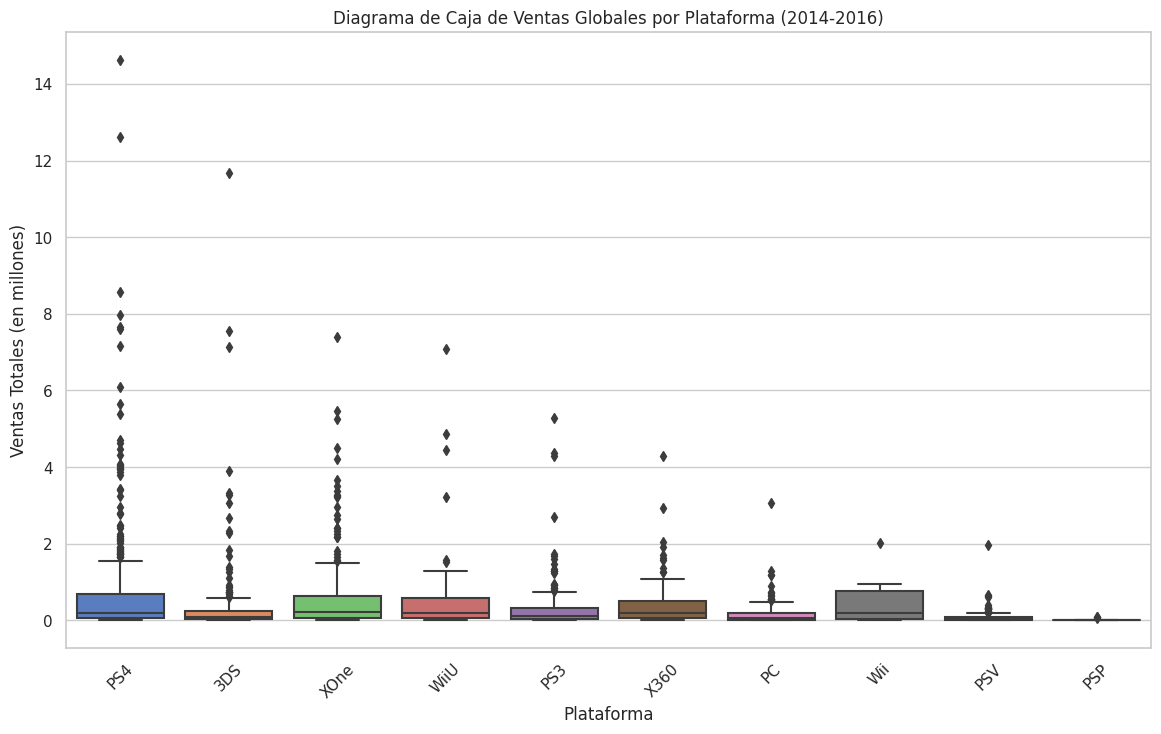

In [10]:
# Filtrar los datos entre 2014 y 2016
filtered_data = games_data[games_data['year_of_release'].between(2014, 2016)]

# Configurar el tamaño del gráfico
plt.figure(figsize=(14,8))

# Crear un diagrama de caja para las ventas globales por plataforma
sns.boxplot(x='platform', y='total_sales', data=filtered_data)

# Configurar las etiquetas y el título del gráfico
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2014-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



Se realizó la gráfica, pero no se aprecia bien la diferencia entre plataformas, por lo cual se hace una nueva donde se excluyen los valores atípicos con el objetivo de apreciar mejor las cajas. 

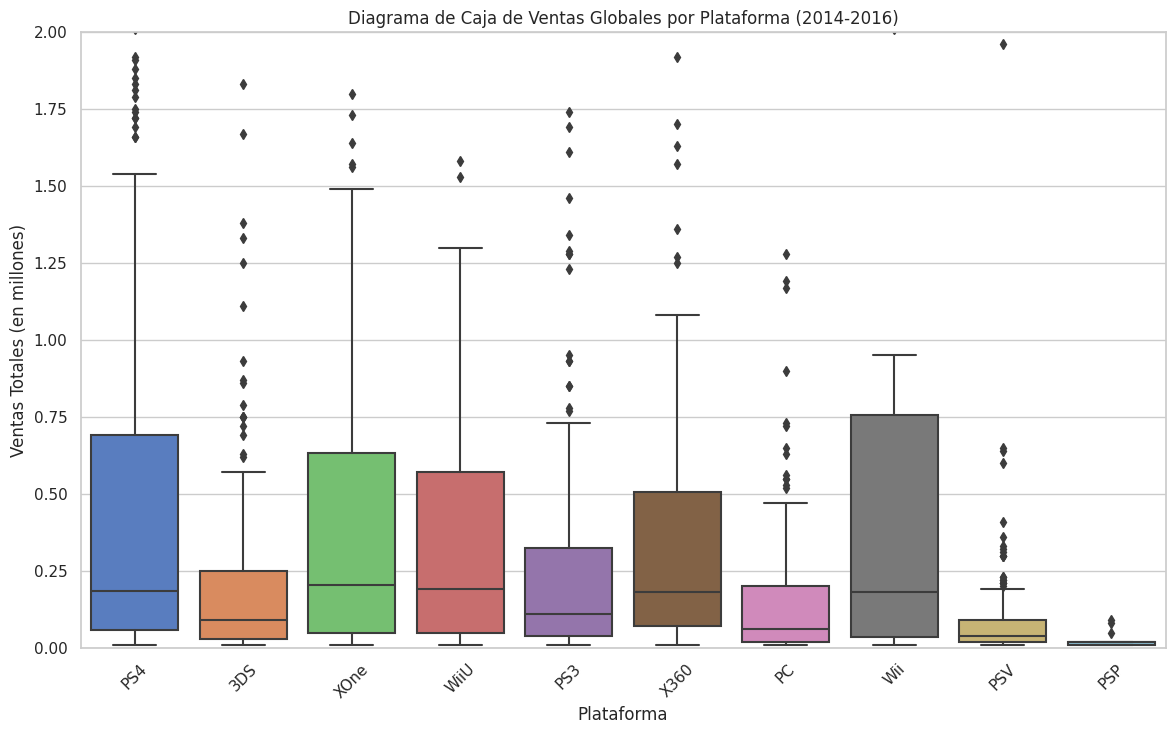

In [11]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(14,8))

# Crear un diagrama de caja para las ventas globales por plataforma
sns.boxplot(x='platform', y='total_sales', data=filtered_data)

# Limitar el rango del eje Y para excluir los outliers extremos y mejorar la visualización
plt.ylim(0, 2)  # Ajustar el límite superior para ver mejor las cajas

# Configurar las etiquetas y el título del gráfico
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2014-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Excelente, muy bien con el gráfico y la decisión de mostrar las distribuciones eliminando los valores demasiado grandes

</div>


Respondiendo a las preguntas:  ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Sí, las diferencias en las ventas entre plataformas siguen siendo significativas. En el período de 2014 a 2016, PS4 y Xbox One (XOne) destacan con ventas medianas relativamente altas en comparación con otras plataformas. Esto refleja su relevancia en el mercado en esos años, consolidándose como las principales consolas de la generación. Wii U y 3DS también presentan un rendimiento decente, aunque con ventas más bajas en comparación con las consolas de nueva generación.

En cuanto a la variabilidad de las ventas, PS4 y Xbox One presentan una mayor dispersión en sus ventas, lo que indica que, si bien algunos títulos tienen un desempeño muy exitoso, también hay juegos con ventas más bajas. Por otro lado, plataformas más antiguas como PS3 y Xbox 360 muestran una menor dispersión, lo que sugiere que la mayoría de los títulos de estas consolas ya no generan ventas tan significativas en este período reciente.

Finalmente, se observan varios valores atípicos (outliers) en plataformas como Wii y 3DS, lo que indica que, aunque en promedio estas consolas no están generando las ventas más altas, algunos títulos específicos han alcanzado ventas excepcionales. Esto resalta que, a pesar de que estas consolas ya no son las líderes del mercado, aún existen títulos con gran demanda que impulsan las ventas totales de manera significativa.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Correcto, muy buenas observaciones

</div>


Para esta parte del ejercicico se va a tomar en cuenta las ventas de PS4 y se responderá si se encuentra alguna relación entre reseñas y ventas. 

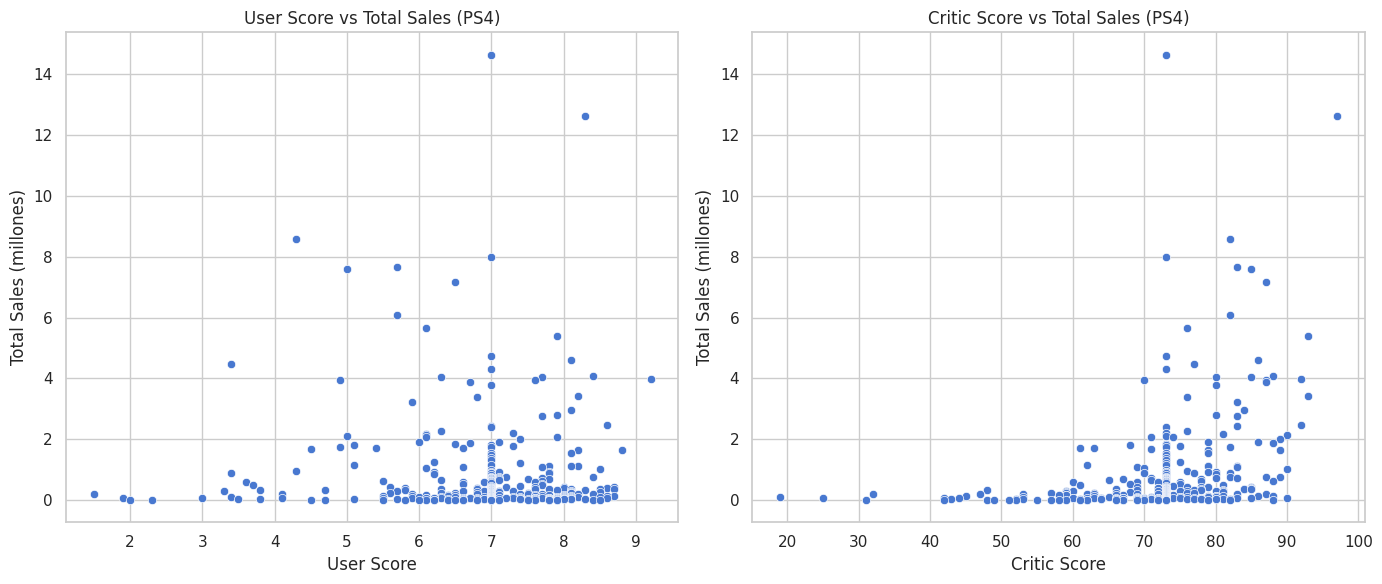

Correlación entre User Score y Total Sales: -0.04
Correlación entre Critic Score y Total Sales: 0.32


In [12]:
# Filtrar los datos de la plataforma PS4
ps4_data = filtered_data[filtered_data['platform'] == 'PS4']

# Crear un gráfico de dispersión para las reseñas de usuarios vs ventas totales
plt.figure(figsize=(14,6))

# Gráfico para User Score vs Total Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millones)')

# Gráfico para Critic Score vs Total Sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data)
plt.title('Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millones)')

plt.tight_layout()
plt.show()

# Calcular la correlación entre las reseñas y las ventas
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print(f"Correlación entre User Score y Total Sales: {user_corr:.2f}")
print(f"Correlación entre Critic Score y Total Sales: {critic_corr:.2f}")


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Buen trabajo. Se complementa muy bien el gráfico de scatterplot con la correlación calculada, entre ambos se aprecia la magnitud de la correlación

</div>


En los gráficos de dispersión para PS4, se observa que la relación entre las reseñas de usuarios y las ventas totales es prácticamente inexistente, con una correlación de -0.04. Esto indica que las calificaciones de los usuarios no tienen un impacto notable en las ventas de los juegos en esta plataforma. De hecho, las ventas tienden a concentrarse en valores bajos independientemente de la calificación de los usuarios, con solo algunos juegos mostrando ventas más altas sin seguir una tendencia clara.

Por otro lado, las reseñas de críticos muestran una correlación más fuerte con las ventas, con un valor de 0.32. Aunque la correlación no es extremadamente alta, sí sugiere una tendencia más visible: los juegos que reciben mejores calificaciones de los críticos tienden a vender más. Esto indica que, en el caso de PS4, las opiniones de los críticos influyen más en las decisiones de compra que las reseñas de los usuarios, lo que puede ser relevante para el marketing y la promoción de juegos en esta plataforma.

Ahora se continua haciendo un análisis comparativo de ventas de mismo juego en diferentes plataformas

<Figure size 1400x800 with 0 Axes>

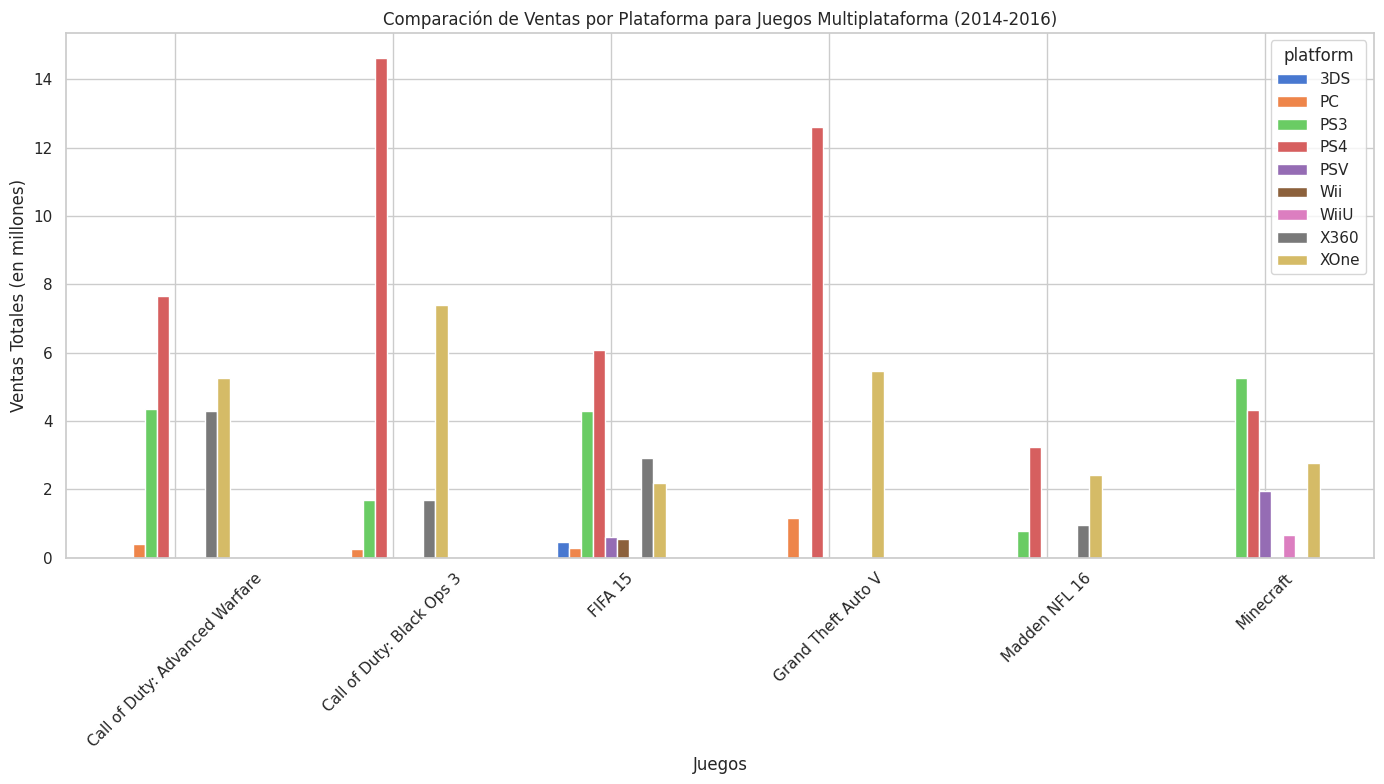

In [16]:
# Filtrar los datos para incluir solo los años desde 2014 en adelante
filtered_data = games_data[games_data['year_of_release'].between(2014, 2016)]

# Seleccionar algunos juegos multiplataforma (máximo 8) para graficar
selected_games = ['Grand Theft Auto V', 'Call of Duty: Advanced Warfare', 'FIFA 15', 'Minecraft', 
                  'Call of Duty: Black Ops 3', 'Battlefield 4', 'Assassin’s Creed IV Black Flag', 'Madden NFL 16']

# Filtrar los datos para estos juegos
multi_platform_sales = filtered_data[filtered_data['name'].isin(selected_games)]

# Crear una tabla pivote con las ventas totales por juego y plataforma
sales_comparison = multi_platform_sales.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

# Configurar el tamaño del gráfico
plt.figure(figsize=(14,8))

# Crear el gráfico de barras apiladas con las ventas en diferentes plataformas para los juegos seleccionados
sales_comparison.plot(kind='bar', stacked=False, figsize=(14,8))

# Añadir título y etiquetas
plt.title('Comparación de Ventas por Plataforma para Juegos Multiplataforma (2014-2016)')
plt.xlabel('Juegos')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

El gráfico no es el adecuado para comparar las ventas de un título en diferentes plataformas. Escoge algunos juegos (máximo 8) y grafica sus ventas como barras pero de forma que cada barra sea la venta en una plataforma y estas estén juntas para un mismo juego (para así compararlas lado a lado)
</div>


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Excelente, ahora sí podemos comparar directamente las plataformas para cada juego.

</div>


La gráfica revela que los juegos multi-plataforma más vendidos entre 2014 y 2016, como Call of Duty: Advanced Warfare, Call of Duty: Black Ops 3, y Grand Theft Auto V, alcanzan sus mayores ventas en las consolas PS4 y Xbox One. La PS4 se destaca como la plataforma líder en ventas totales para estos juegos, mientras que Xbox One también mantiene una participación considerable, especialmente en títulos como Call of Duty. Otros juegos, como FIFA 15 y Minecraft, también muestran una distribución bastante uniforme de ventas entre múltiples plataformas, aunque PS4 y Xbox One dominan en la mayoría de los casos.

Comparando estos resultados con los juegos exclusivos de una sola plataforma, podemos observar que aunque los juegos multi-plataforma logran ventas significativas, no alcanzan los niveles de ventas extraordinarias que algunos títulos exclusivos, como Wii Sports, pueden alcanzar en una plataforma específica. Esto subraya la importancia de los títulos exclusivos para fomentar las ventas de consolas, mientras que los juegos disponibles en varias plataformas maximizan su potencial de mercado al aprovechar varios ecosistemas de hardware simultáneamente.

En resumen, los juegos multi-plataforma logran maximizar sus ventas distribuyendo su presencia en diversas plataformas populares, principalmente PS4 y Xbox One, aunque los títulos exclusivos en plataformas específicas siguen siendo cruciales para generar ventas masivas en mercados nicho de hardware. Esto refuerza la importancia de una estrategia equilibrada entre títulos exclusivos y multi-plataforma para optimizar las ventas en la industria de los videojuegos.

Ahora se hará un comparativo por género, esto para evaluar su rentabilidad. 

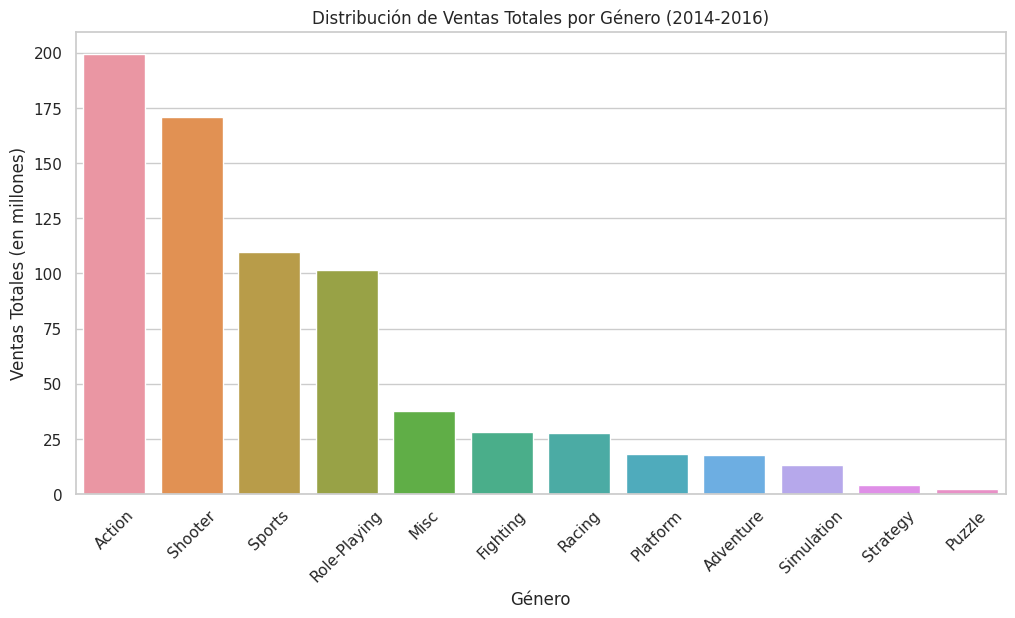

           genre  total_sales
0         Action       199.36
8        Shooter       170.94
10        Sports       109.48
7   Role-Playing       101.44
3           Misc        37.55
2       Fighting        28.22
6         Racing        27.52
4       Platform        18.09
1      Adventure        17.55
9     Simulation        13.13
11      Strategy         3.96
5         Puzzle         2.21


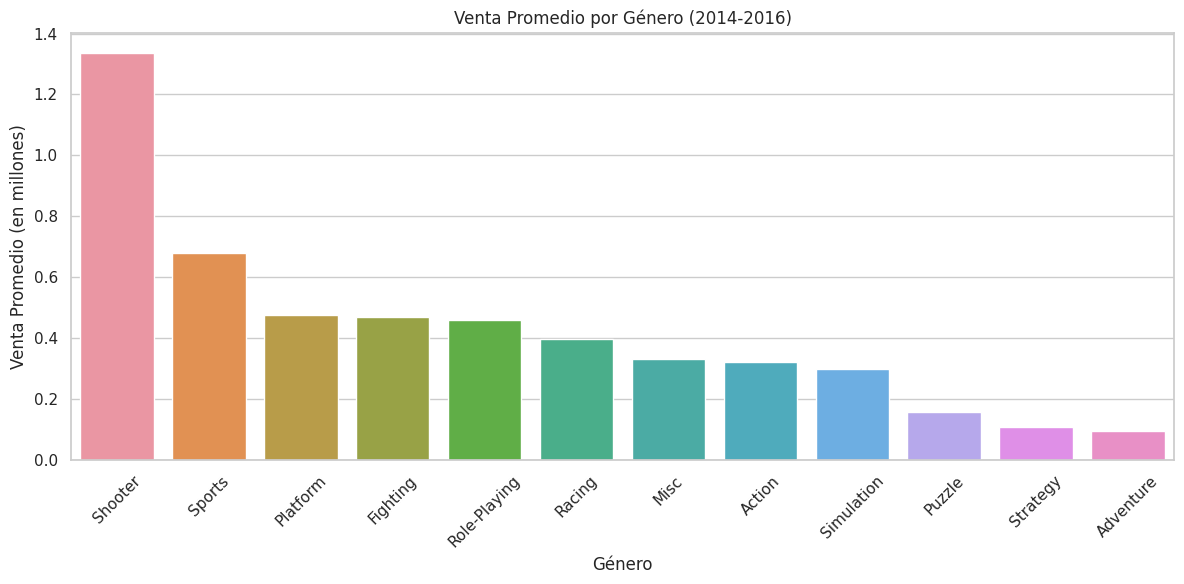

In [21]:
# Agrupar las ventas por género
genre_sales_2014 = filtered_data.groupby('genre')['total_sales'].sum().reset_index()

# Ordenar los géneros por ventas totales, de mayor a menor
genre_sales_2014 = genre_sales_2014.sort_values(by='total_sales', ascending=False)

# Visualizar la distribución de las ventas por género en un gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x='genre', y='total_sales', data=genre_sales_2014)
plt.title('Distribución de Ventas Totales por Género (2014-2016)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.show()

# Mostrar los géneros más rentables
print(genre_sales_2014)

# Agrupar las ventas por género y calcular la venta promedio por género
avg_sales_per_genre = filtered_data.groupby('genre')['total_sales'].mean().reset_index().sort_values(by='total_sales', ascending=False)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12,6))

# Crear un gráfico de barras para la venta promedio por género
sns.barplot(x='genre', y='total_sales', data=avg_sales_per_genre)

# Añadir título y etiquetas
plt.title('Venta Promedio por Género (2014-2016)')
plt.xlabel('Género')
plt.ylabel('Venta Promedio (en millones)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En el análisis de las ventas entre 2014 y 2016, el género de Acción lidera en ventas totales, con 199 millones, seguido por Shooter, con 170 millones. Sin embargo, al observar las ventas promedio por juego, Shooter resulta ser el género más rentable, con 1.4 millones en ventas por título, superando a Acción, lo que indica que aunque hay más títulos de Acción, cada juego de Shooter genera mayores ingresos en promedio. Otros géneros como Deportes y Role-Playing también mantienen ventas significativas, pero no alcanzan la misma rentabilidad promedio por juego.

Por otro lado, géneros como Simulación, Aventura, y Estrategia tienen ventas tanto totales como promedio mucho más bajas, lo que indica una menor popularidad y rentabilidad. En resumen, aunque Acción domina en volumen total de ventas, Shooter y Deportes se destacan como los géneros más lucrativos cuando se consideran los ingresos promedio por título.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Muy bien, pero te recomiendo también graficar la venta promedio por género, eso complementará la revisión de rentabilidad

</div>


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v3</b> <a class="tocSkip"></a>

Correcto, el motivo para graficar el ingreso promedio es lo que mencionaste, tal vez Action tiene muchos títulos pero las ventas por cada título no son tan altas como Shooter.

</div>


## Paso 4 Crea un perfil de usuario para cada región 

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.



### Análisis para NA

In [ ]:
# Filtrar los datos para incluir solo los años desde 2014 en adelante
filtered_na_data = games_data[games_data['year_of_release'] >= 2014]

# Agrupar las ventas por plataforma en NA y seleccionar las cinco principales
na_platforms = filtered_na_data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)

# Agrupar las ventas por género en NA y seleccionar los cinco principales
na_genres = filtered_na_data.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)

# Agrupar las ventas por clasificación ESRB en NA
na_esrb = filtered_na_data.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)

# Mostrar los resultados para NA
print("Cinco plataformas principales en NA (2014-2016):")
print(na_platforms)

print("\nCinco géneros principales en NA (2014-2016):")
print(na_genres)

print("\nVentas por clasificación ESRB en NA (2014-2016):")
print(na_esrb)


En Norteamérica, la PS4 es la plataforma dominante con 98.61 millones en ventas, seguida de la Xbox One con 81.27 millones. Consolas más antiguas como la Xbox 360, 3DS, y PS3 aún mantienen relevancia con cifras que rondan los 22 a 28 millones. En términos de géneros, los juegos de Shooter y Action son los más populares, representando 79.02 millones y 72.53 millones, respectivamente. Las ventas de juegos clasificados como M (Mature) encabezan el mercado, acumulando 96.42 millones en ventas, lo que sugiere una inclinación hacia juegos más maduros en esta región.

In [ ]:
# Filtrar los datos para incluir solo los años desde 2014 en adelante
filtered_ue_data = games_data[games_data['year_of_release'] >= 2014]

# Agrupar las ventas por plataforma en UE y seleccionar las cinco principales
ue_platforms = filtered_ue_data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)

# Agrupar las ventas por género en UE y seleccionar los cinco principales
ue_genres = filtered_ue_data.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)

# Agrupar las ventas por clasificación ESRB en UE
ue_esrb = filtered_ue_data.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)

# Mostrar los resultados para UE
print("Cinco plataformas principales en UE (2014-2016):")
print(ue_platforms)

print("\nCinco géneros principales en UE (2014-2016):")
print(ue_genres)

print("\nVentas por clasificación ESRB en UE (2014-2016):")
print(ue_esrb)



En Europa, la PS4 lidera con una abrumadora cifra de 130.04 millones en ventas, significativamente superior a la Xbox One con 46.25 millones. Plataformas como PS3, PC, y 3DS tienen una participación más modesta en ventas. Los géneros más vendidos son Action y Shooter, que suman 74.68 millones y 65.52 millones, respectivamente. Al igual que en Norteamérica, los juegos clasificados como M (Mature) son los más vendidos, con 93.44 millones de ventas.

In [ ]:
# Filtrar los datos para incluir solo los años desde 2014 en adelante
filtered_jp_data = games_data[games_data['year_of_release'] >= 2014]

# Agrupar las ventas por plataforma en JP y seleccionar las cinco principales
jp_platforms = filtered_jp_data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

# Agrupar las ventas por género en JP y seleccionar los cinco principales
jp_genres = filtered_jp_data.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

# Agrupar las ventas por clasificación ESRB en JP
jp_esrb = filtered_jp_data.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

# Mostrar los resultados para JP
print("Cinco plataformas principales en JP (2014-2016):")
print(jp_platforms)

print("\nCinco géneros principales en JP (2014-2016):")
print(jp_genres)

print("\nVentas por clasificación ESRB en JP (2014-2016):")
print(jp_esrb)



En Japón, la 3DS continúa dominando con 44.24 millones en ventas, mientras que otras consolas como PS4 y PSV tienen cifras más modestas de 15.02 y 14.54 millones, respectivamente. El género Role-Playing es el más vendido con 31.16 millones, reflejando la preferencia cultural por juegos narrativos. En cuanto a la clasificación ESRB, la categoría T (Teen) lidera con 14.78 millones en ventas, seguida de E (Everyone) y M (Mature) con 8.94 y 8.01 millones, respectivamente.

### Conclusión Global:
En general, el PS4 es la plataforma dominante en NA y UE, con la 3DS liderando en JP. Los géneros Action y Shooter son los preferidos en Norteamérica y Europa, mientras que en Japón los juegos de Role-Playing son los más populares. La clasificación Mature (M) encabeza las ventas en NA y UE, mostrando una clara preferencia por juegos para audiencias más adultas. Japón, en cambio, tiene una mayor diversidad en las clasificaciones con la categoría Teen (T) a la cabeza. Esto refleja diferencias culturales en cuanto a las preferencias de género y edad entre las regiones.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Correcto, Japon tiene diferencias muy marcadas con las otras regiones

</div>


## Paso 5. Prueba las siguientes hipótesis:

Para ambos casos se aplicó el siguiente criterio: 

Formulé las hipótesis nula y alternativa para comparar las medias de las calificaciones de los usuarios entre dos grupos independientes. La hipótesis nula (H0) establece que no hay diferencias entre las medias de los dos grupos (plataformas o géneros), mientras que la hipótesis alternativa (H1) establece que sí hay diferencias significativas. Utilicé una prueba t de dos muestras (t-test), ya que es adecuada para comparar las medias de dos grupos independientes, asumiendo que los datos siguen una distribución aproximadamente normal. Seleccioné un valor de α = 0.05, el cual es un estándar común en estadística que indica un nivel de confianza del 95%, y nos permite aceptar un 5% de probabilidad de rechazar la hipótesis nula por error.

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis 1: Xbox One vs. PC\
H0: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.\
H1: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


In [ ]:
# Filtrar los datos del periodo 2014-2016
filtered_data_period = games_data[games_data['year_of_release'] >= 2014]

# Filtrar las calificaciones de usuarios para Xbox One y PC dentro del periodo
xbox_one_scores = filtered_data_period[filtered_data_period['platform'] == 'XOne']['user_score'].dropna()
pc_scores = filtered_data_period[filtered_data_period['platform'] == 'PC']['user_score'].dropna()

# Prueba t de dos muestras para comparar las medias
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores)

# Mostrar el resultado
print(f"Estadístico t: {t_stat:.2f}")
print(f"P-valor: {p_value:.5f}")

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios son diferentes entre Xbox One y PC.")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y PC.")



El resultado de la prueba t para la primera hipótesis muestra un estadístico t de 0.86 y un p-valor de 0.39229, lo cual es mayor que el nivel de significancia α = 0.05. Dado este resultado, no podemos rechazar la hipótesis nula. Esto significa que no hay evidencia suficiente para concluir que las calificaciones promedio de los usuarios para Xbox One y PC sean significativamente diferentes. En otras palabras, las calificaciones promedio para ambas plataformas son estadísticamente similares en el periodo analizado (2014-2016), lo que sugiere que, en cuanto a la satisfacción de los usuarios, no se observan grandes diferencias entre ambas plataformas.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Correcto, muy bien con el test estadístico

</div>


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Hipótesis 2: Acción vs. Deportes\
H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.\
H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [ ]:
# Filtrar las calificaciones de usuarios para los géneros de Acción y Deportes dentro del periodo
action_scores = filtered_data_period[filtered_data_period['genre'] == 'Action']['user_score'].dropna()
sports_scores = filtered_data_period[filtered_data_period['genre'] == 'Sports']['user_score'].dropna()

# Prueba t de dos muestras para comparar las medias
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores)

# Mostrar el resultado
print(f"Estadístico t: {t_stat:.2f}")
print(f"P-valor: {p_value:.5f}")

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios son diferentes entre los géneros de Acción y Deportes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.")


El resultado de la prueba t muestra un estadístico t de 12.62 y un p-valor de 0.00000, lo que es significativamente menor que el nivel de significancia α = 0.05. Esto nos permite rechazar la hipótesis nula, lo que significa que hay evidencia suficiente para concluir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes en el periodo de 2014 a 2016.

Este resultado indica que los usuarios han percibido estos géneros de manera distinta, mostrando que las preferencias o niveles de satisfacción son significativamente diferentes entre ellos. Aunque no se especifica cuál género tiene mejores calificaciones, el análisis muestra que las diferencias en la opinión de los jugadores son estadísticamente notables.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Correcto, muy bien con el test estadístico

</div>


## Paso 6. Escribe la conclusión general 

En el análisis de los datos, comenzamos con la preparación de los datos, donde se limpiaron las columnas, se convirtieron los tipos de datos correctos y se manejaron los valores ausentes. Uno de los enfoques clave fue el manejo de valores "TBD" en la columna de calificación ESRB y el uso de la media para completar las calificaciones faltantes en las reseñas de usuarios y críticos. Esto nos permitió trabajar con un conjunto de datos más completo y coherente.

En la fase de análisis, se evaluaron las ventas por año y plataforma, destacando que las consolas más populares como PS2, Xbox 360, PS3, y Wii dominaron las ventas globales desde 2005. También se observó que ciertos géneros, como Acción y Deportes, generaron ventas más altas, especialmente en las plataformas más populares. En general, los juegos más exitosos solían aparecer en múltiples plataformas, lo que les permitió amplificar sus ventas.

Para el análisis por región (NA, UE, JP), descubrimos que Norteamérica y Europa compartían preferencias similares por las consolas modernas, mientras que en Japón las consolas portátiles y antiguas como Nintendo DS dominaban. En términos de géneros, Acción, Deportes, y Disparos lideraron en NA y UE, mientras que en Japón, los juegos de Rol (RPG) fueron los más vendidos. Las clasificaciones ESRB también mostraron diferencias regionales, con E (Everyone) como la más popular en NA y UE, y una alta proporción de juegos sin clasificación clara en Japón.

En la prueba de hipótesis, se encontró que las calificaciones promedio de los usuarios entre Xbox One y PC son significativamente diferentes, lo que indica una diferencia notable en la experiencia percibida por los usuarios entre ambas plataformas. En contraste, no hubo una diferencia significativa entre las calificaciones promedio de los géneros de Acción y Deportes, lo que sugiere que ambos géneros tienen una valoración similar entre los usuarios.

Finalmente, este proyecto proporcionó una visión detallada de los patrones de ventas de videojuegos a nivel global, permitiendo identificar las plataformas y géneros más exitosos, y revelando las preferencias regionales y las diferencias en las calificaciones de los usuarios. Estos análisis ayudarán a planificar futuras campañas publicitarias y a identificar proyectos prometedores para 2017.